# Olympic Data - Exploratory Data Analysis by Python

In [12]:
#Lets us first import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
#Let us import the dataset.
df=pd.read_csv('dataset_olympics.csv')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


In [6]:
#Let first see the sample data
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [22]:
#Let now check for empty or Duplicate values, but first let see the data profile
df.describe()



,ID,Age,Height,Weight,Year
count,70000.000000,67268.000000,53746.000000,52899.000000,70000.000000
mean,18081.846986,25.644645,175.505303,70.900216,1977.766457
std,10235.613253,6.485239,10.384203,14.217489,30.103306
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9325.750000,21.000000,168.000000,61.000000,1960.000000
50%,18032.000000,25.000000,175.000000,70.000000,1984.000000
75%,26978.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


In [23]:
df.describe(include=['object'])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,70000,70000,70000,70000,70000,70000,70000,70000,70000,9690
unique,35556,2,827,226,51,2,42,65,744,3
top,Oksana Aleksandrovna Chusovitina,M,United States,USA,2016 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,29,51877,4979,5216,3675,58467,6034,10629,1738,3292


#### This shows the count of each object and which has most frequency.


In [10]:
#check for null
df.isna().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

#### Here there is a lot of values as null in Medal, we have to ignore this. Also a lot do not have age, height, and Weight, let also ignore this, as we will not be using this three metrics a lot.

In [38]:
#check for duplicates
df.duplicated().sum()

383

In [39]:
#Lets confirm the duplicates 
df[df.duplicated()]



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4862,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
4864,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67774,34642,Clara Beatrice Fenton,F,45.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
69050,35215,Pedro Figari Solari,M,71.0,NaN,NaN,Uruguay,URU,1932 Summer,1932,Summer,Los Angeles,Art Competitions,Art Competitions Mixed Unknown Event,NaN
69051,35215,Pedro Figari Solari,M,71.0,NaN,NaN,Uruguay,URU,1932 Summer,1932,Summer,Los Angeles,Art Competitions,Art Competitions Mixed Unknown Event,NaN
69052,35215,Pedro Figari Solari,M,71.0,NaN,NaN,Uruguay,URU,1932 Summer,1932,Summer,Los Angeles,Art Competitions,Art Competitions Mixed Unknown Event,NaN


In [43]:
#Let us remove the duplicates.
df.drop_duplicates(inplace=True)

In [45]:
#Let now again see the data profile
df.describe()

,ID,Age,Height,Weight,Year
count,69617.000000,66946.000000,53741.000000,52899.000000,69617.000000
mean,18073.006378,25.544260,175.504736,70.900216,1978.021862
std,10240.599374,6.253257,10.384481,14.217489,29.982224
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9303.000000,21.000000,168.000000,61.000000,1960.000000
50%,18029.000000,24.000000,175.000000,70.000000,1984.000000
75%,26965.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


In [46]:
df.describe(include=['object'])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,69617,69617,69617,69617,69617,69617,69617,69617,69617,9686
unique,35556,2,827,226,51,2,42,65,744,3
top,Oksana Aleksandrovna Chusovitina,M,United States,USA,2016 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,29,51531,4896,5133,3675,58084,6001,10629,1738,3290


## Now Lets start for Data Analysis....


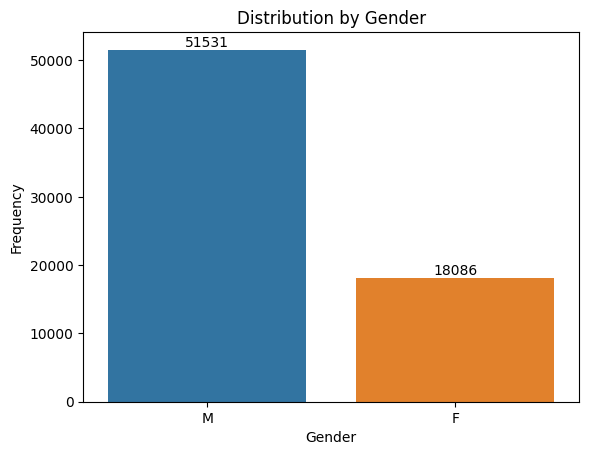

In [52]:
#Lets create a Genderwise Player Count
ax= sns.countplot(x='Sex', data=df, hue='Sex')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution by Gender')
for bars in ax.containers:
    ax.bar_label(bars)

### Almost more than 2.5 times is the distribution of Male higher than Female.

Text(0.5, 1.0, 'Distribution by Age')

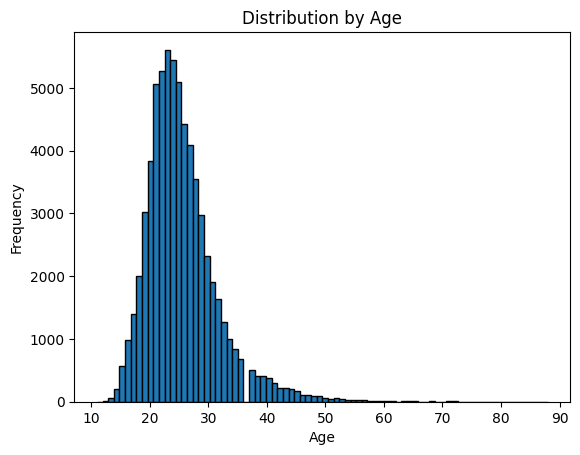

In [71]:
#Lets create Agewise Frequency
plt.hist(df['Age'], bins=80, edgecolor='black',)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution by Age')


### We can see that Age group of 20-30 has the highest distribution

Text(0.5, 1.0, 'Distribution by Height')

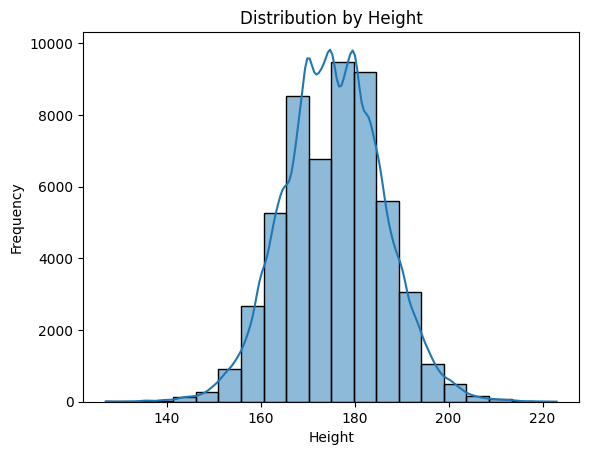

In [83]:
#lets check Height Distribution
sns.histplot(x='Height',bins=20 ,data=df, kde=True)
plt.ylabel('Frequency')
plt.title('Distribution by Height')

### We can see that Height around 180 has the highest distribution.

Text(0.5, 1.0, 'Distribution by Weight')

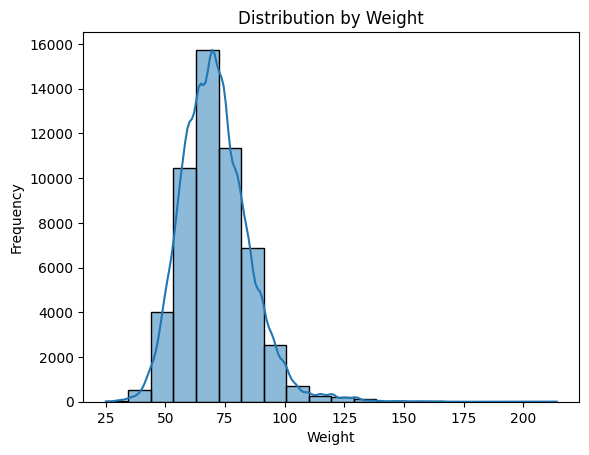

In [78]:
#Lets check Weight Distribution
sns.histplot(x='Weight',bins=20 ,data=df, kde=True)
plt.ylabel('Frequency')
plt.title('Distribution by Weight')


### We can see that Weight around  60-75 has the highest distribution

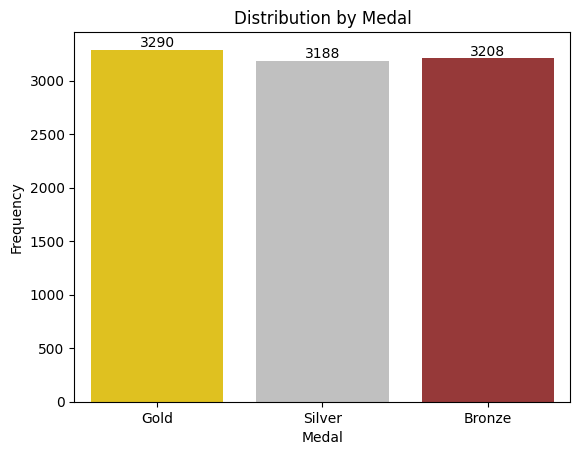

In [91]:
#Lets find Medal Distribution
medal_colour={
    'Gold':'gold',
    'Silver':'silver',
    'Bronze':'brown'
}

ax=sns.countplot(x='Medal', data=df, hue='Medal', legend=False, palette=medal_colour,order=['Gold', 'Silver', 'Bronze'] )
plt.ylabel('Frequency')
plt.title('Distribution by Medal')
for bars in ax.containers:
    ax.bar_label(bars)

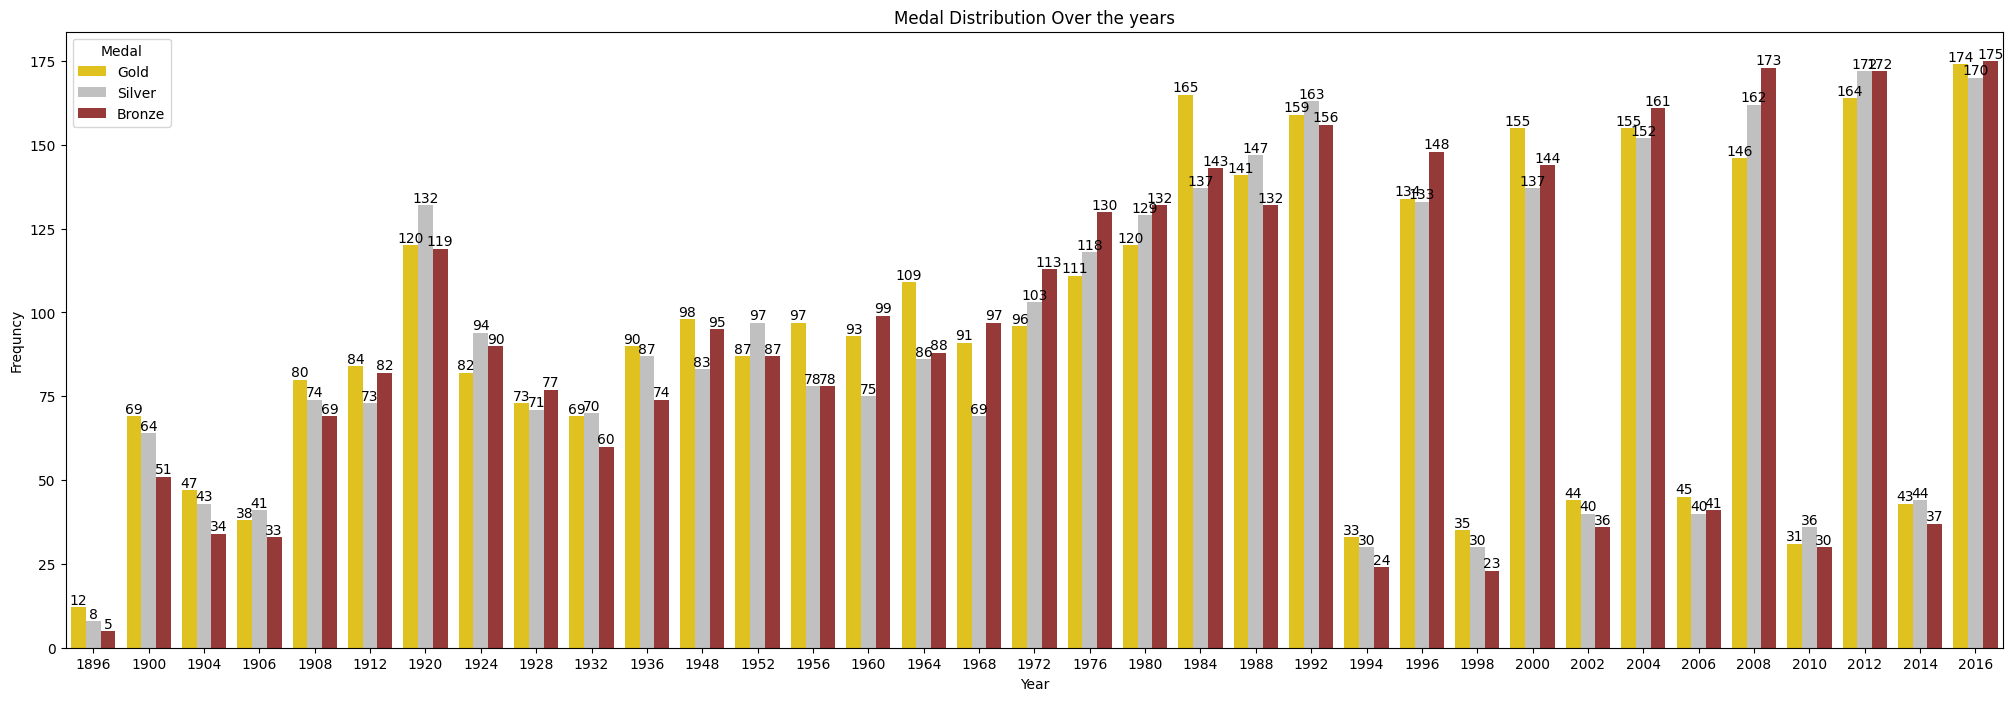

In [117]:
#Lets create the Medal Distribution over the years
plt.figure(figsize=(25,8))
ax=sns.countplot(x='Year', data=df, hue='Medal', palette=medal_colour, hue_order=['Gold', 'Silver','Bronze'])
plt.ylabel('Frequncy')
plt.title('Medal Distribution Over the years')
for bars in ax.containers:
    ax.bar_label(bars)
    


<Axes: title={'center': 'Yearwise Mean of Age'}, xlabel='Year', ylabel='Mean Age'>

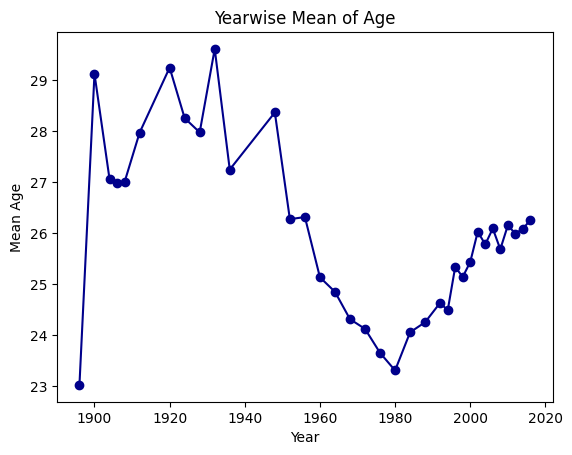

In [127]:
#Lets find yearwise mean of Age
df.groupby(['Year'])['Age'].mean().plot(kind='line', marker='o', color='darkblue', ylabel='Mean Age', title='Yearwise Mean of Age')

#### In 1980, many western countries boycotted olympics, this led to reduced participation from older, experienced athletes from those countries.

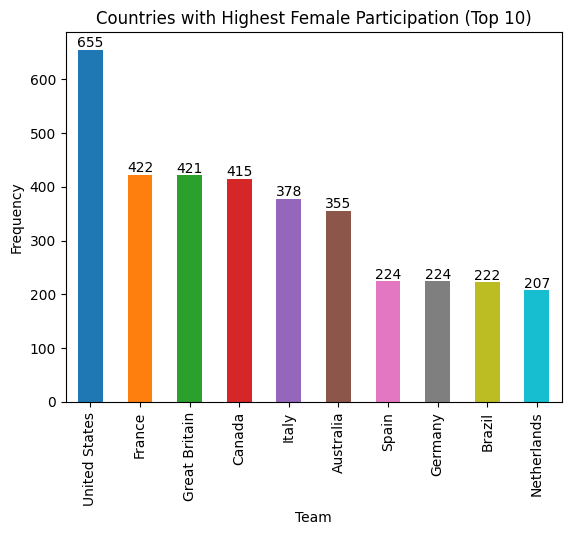

In [212]:
#lets find Country with highest Women Participation (top 10)
colors=plt.cm.tab10.colors
women_df= df[df['Sex']=='F'].drop_duplicates(subset='ID')
ax=women_df.groupby(['Team'])['Sex'].count().sort_values(ascending=False).head(10).plot(kind='bar',color=colors, ylabel='Frequency', title='Countries with Highest Female Participation (Top 10)')

for bars in ax.containers:
    ax.bar_label(bars)


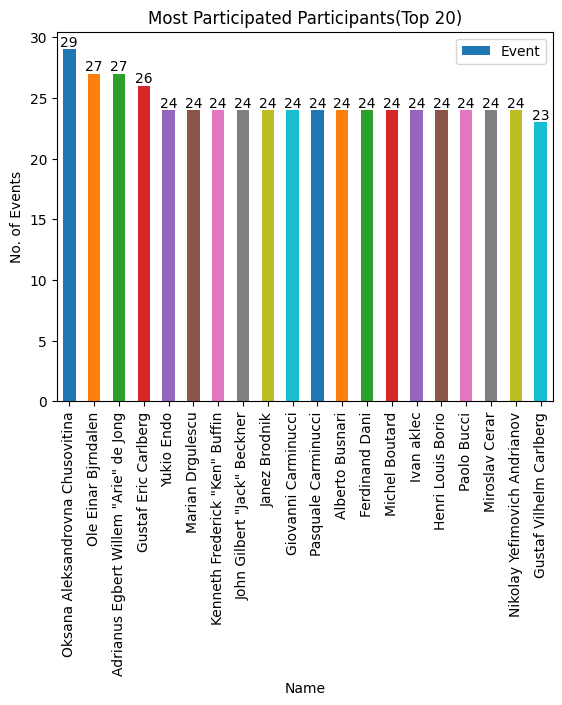

In [197]:
#Lets find top 20 Participants who participated most
top_participant=df.groupby(['ID','Name'])['Event'].count().sort_values(ascending=False).head(20).reset_index()
ax=top_participant.plot(x='Name',y='Event', kind='bar', color=colors , ylabel='No. of Events', title='Most Participated Participants(Top 20)')
for bars in ax.containers:
    ax.bar_label(bars)

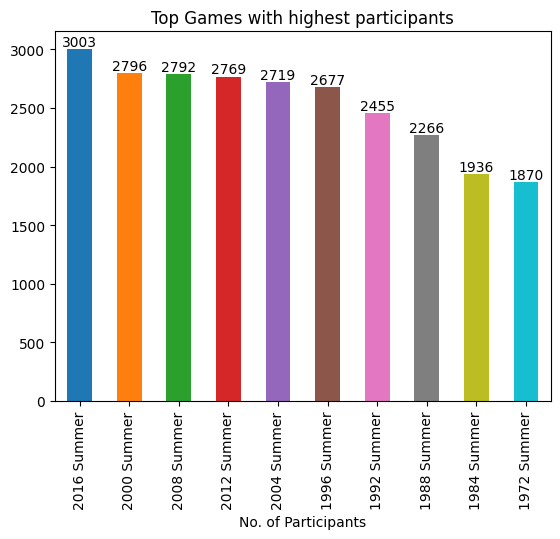

In [213]:
#Lets find top Games with highest participants (Top 10)
top_games=df.groupby(['Games'])['ID'].nunique().sort_values(ascending=False).head(10)
ax=top_games.plot(kind='bar', color=colors, xlabel='No. of Participants', title='Top Games with highest participants')
for bars in ax.containers:
    ax.bar_label(bars)

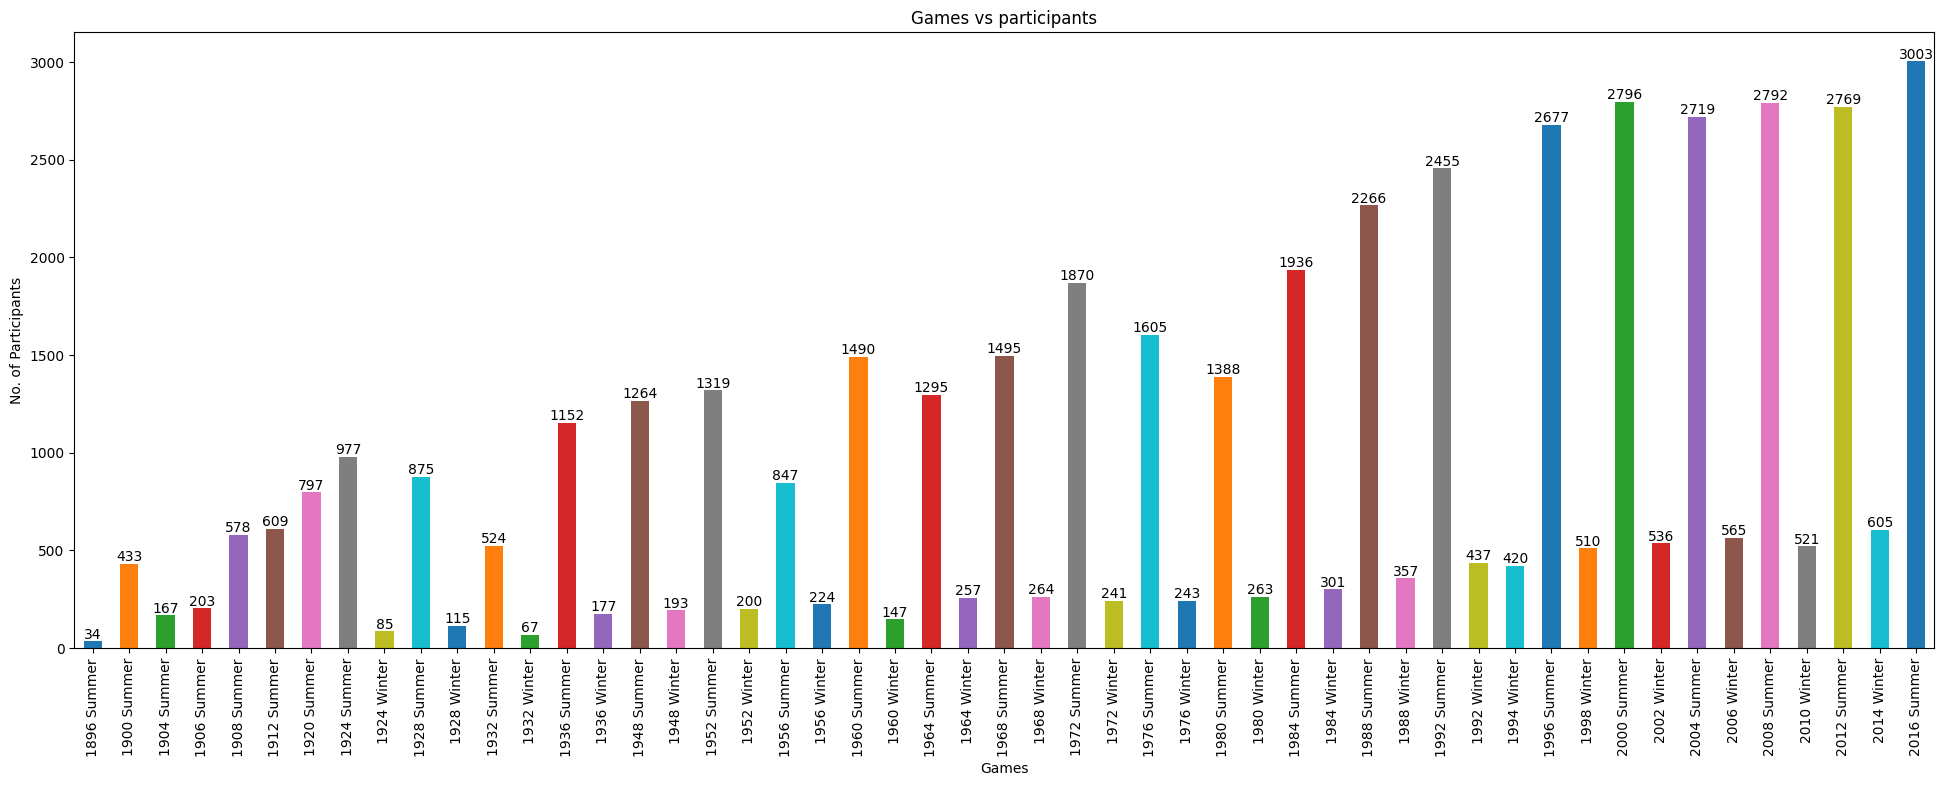

In [228]:
#Now, Lets find all games with no. of partcipants.
plt.figure(figsize=(24,8))
top_games=df.groupby(['Games'])['ID'].nunique()
ax=top_games.plot(kind='bar',color=colors, ylabel='No. of Participants', title='Games vs participants')
for bars in ax.containers:
    ax.bar_label(bars)

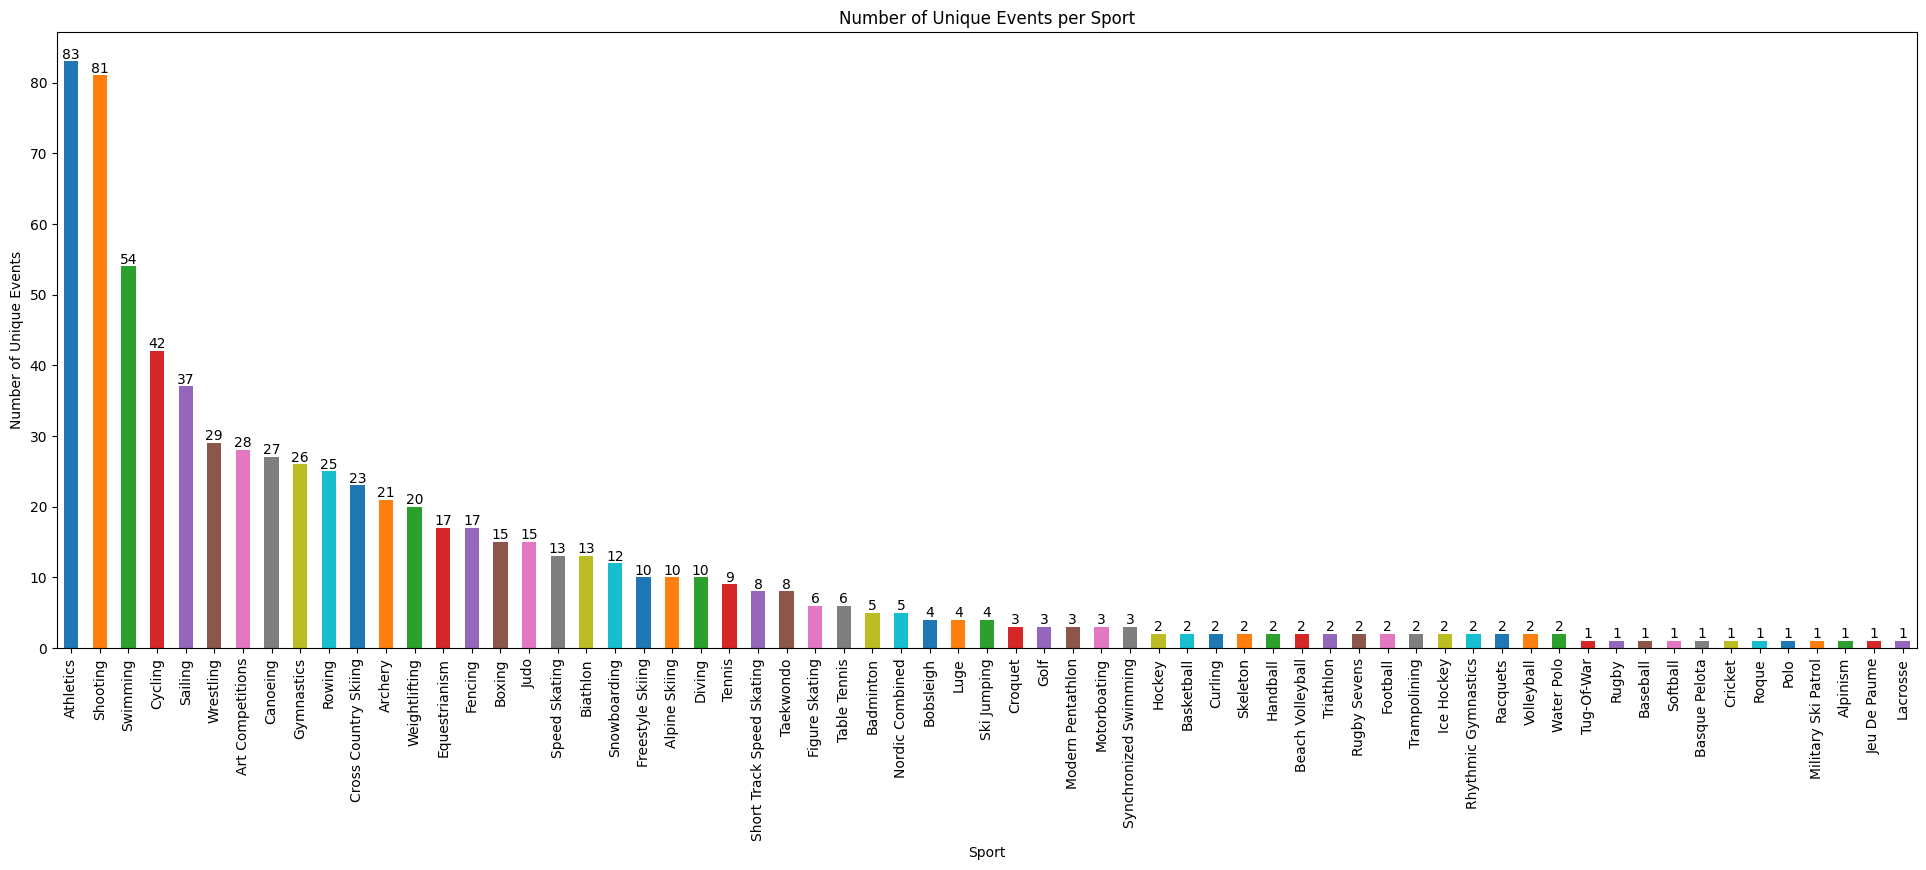

In [242]:
#Lets find no. of unique events per Sport
plt.figure(figsize=(24,8))
ax=df.groupby(['Sport'])['Event'].nunique().sort_values(ascending=False).plot(kind='bar', color=colors, ylabel='Number of Unique Events', title='Number of Unique Events per Sport')
for bars in ax.containers:
    ax.bar_label(bars)

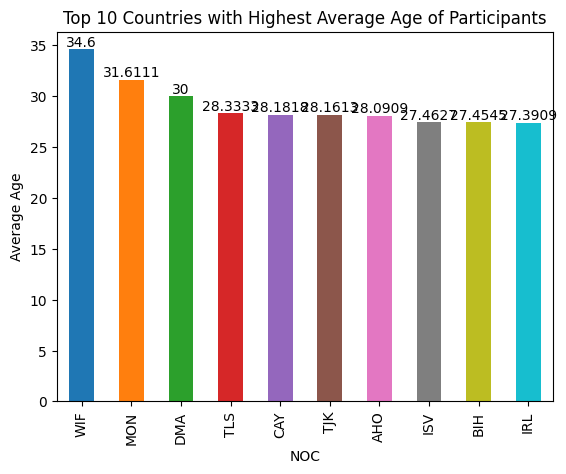

In [244]:
#Lets find top 10 Countries with Highest Avg Age
ax=df.groupby(['NOC'])['Age'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color=colors, ylabel='Average Age', title='Top 10 Countries with Highest Average Age of Participants')
for bars in ax.containers:
    ax.bar_label(bars)

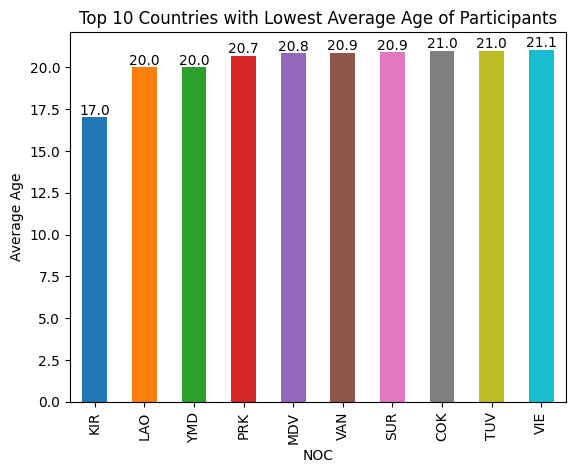

In [250]:
#Lets find top 10 Countries with lOWEST Avg Age
ax=df.groupby(['NOC'])['Age'].mean().sort_values(ascending=True).head(10).plot(kind='bar', color=colors, ylabel='Average Age' ,title='Top 10 Countries with Lowest Average Age of Participants')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f')

Text(0.5, 1.0, 'Distribution of Ages by Season')

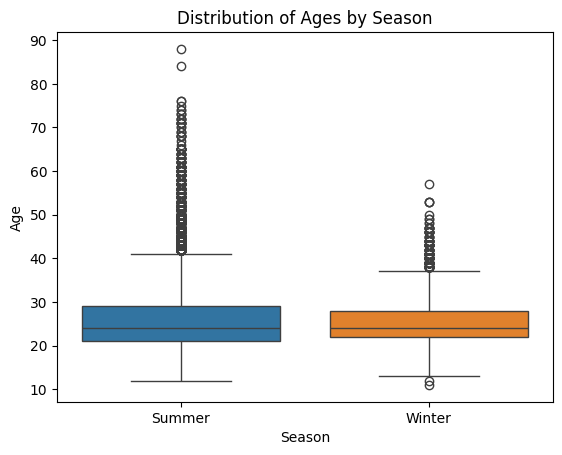

In [254]:
#Lets find Distribution of Ages by Season
sns.boxplot(x='Season', y='Age', data=df, hue='Season')
plt.title('Distribution of Ages by Season')

In [293]:
#Lets find Total Countrywise Medal Tally (Top 30)

df.groupby(['Team'])['Medal'].value_counts().unstack().reindex(columns=["Gold","Silver","Bronze"]).sort_values(by=["Gold","Silver","Bronze"], ascending=False).reset_index().head(30)


Medal,Team,Gold,Silver,Bronze
0,United States,709.0,415.0,336.0
1,Soviet Union,212.0,145.0,147.0
2,Italy,202.0,183.0,186.0
3,France,167.0,183.0,221.0
4,Great Britain,154.0,164.0,163.0
5,Germany,133.0,135.0,128.0
6,Canada,107.0,107.0,114.0
7,Australia,97.0,124.0,149.0
8,Hungary,94.0,67.0,80.0
9,Norway,82.0,84.0,65.0


In [291]:
#Lets see if we find India
indiatally=df.groupby(['Team'])['Medal'].value_counts().unstack().reindex(columns=["Gold","Silver","Bronze"]).sort_values(by=["Gold","Silver","Bronze"], ascending=False).reset_index()

indiatally[indiatally['Team']=='India']

Medal,Team,Gold,Silver,Bronze
25,India,28.0,2.0,4.0
